## Task1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

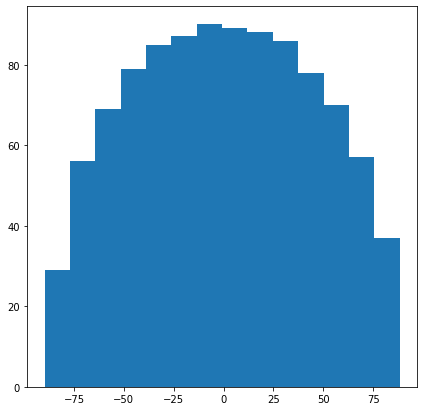

In [9]:
n = 1000
a = np.random.normal(0, 1, (n, n))
A = a + a.T
plt.figure(figsize=(7, 7))
plt.hist(np.linalg.eigvalsh(A), bins=14)
plt.show()

## Task 2

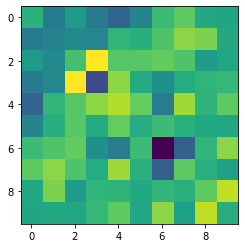

In [70]:
n = 10
a = np.random.normal(0, 1, (n, n))
A = a + a.T
B = A.copy()
eigen_val = np.sort(np.linalg.eigvalsh(A))
plt.imshow(A)
plt.show()

Так как наша матрица симметрична, то у нас не будет комплексно сопряженных собсвенных чисел и значит матрица, к которой мы будем стремится итерациями будет верхнетреугольной.

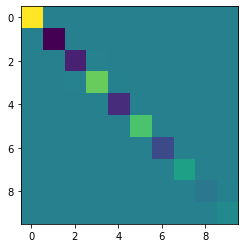

In [66]:
for i in range(100):
    Q, R = np.linalg.qr(A)
    A = R @ Q
plt.imshow(A)

In [67]:
val = []
for i in range(len(A)):
    val.append(A[i][i])
val = np.sort(val)
val, eigen_val

(array([-5.67431701, -4.47645716, -4.02183571, -2.73210721, -0.50930127,
         0.4773232 ,  1.73548744,  3.64692713,  4.29242373,  7.33372585]),
 array([-5.67431701, -4.47705432, -4.0220443 , -2.73210721, -0.51093697,
         0.4789589 ,  1.73548744,  3.64692714,  4.29322948,  7.33372585]))

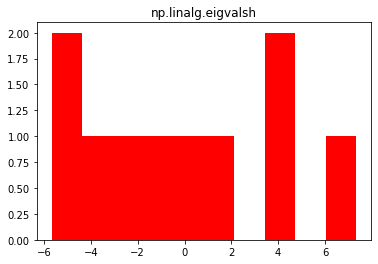

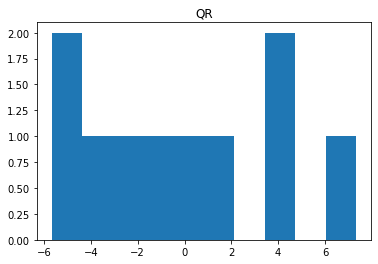

In [68]:
plt.hist(eigen_val, color='red')
plt.title("np.linalg.eigvalsh")
plt.show()
plt.hist(val)
plt.title("QR")
plt.show()

Количество итераций = 27


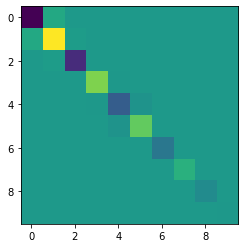

In [71]:
iteration = 0
minn = 0.5 * abs(min(eigen_val))
A = B.copy()
while abs(minn - min(eigen_val)) > 0.01 * abs(min(eigen_val)):
    iteration += 1
    Q, R = np.linalg.qr(A)
    A = R @ Q
    val = []
    for i in range(len(A)):
        val.append(A[i][i])
    minn = min(val)
plt.imshow(A)
print('Количество итераций =', iteration)

## Task 3

have no idea, why eigenvalues will be change

## Task 4

In [75]:
A = np.array([[3,1,0,0], [1,2,0,1], [0,0,1,1], [0,1,1,1]])

In [91]:
np.linalg.eig(A)

(array([ 3.75080042, -0.28399787,  1.21473855,  2.3184589 ]),
 array([[-0.77250966,  0.11203111, -0.35688275,  0.51313991],
        [-0.58000058, -0.36790993,  0.63712901, -0.34972594],
        [-0.08832178, -0.56719284, -0.66792899, -0.4736691 ],
        [-0.2429556 ,  0.7282744 , -0.1434301 , -0.62451324]]))

In [104]:
v0 = abs(np.linalg.eig(A)[1][:,0])
v0 = v0/np.linalg.norm(v0)

In [86]:
def pow_iteration(A, n=10):
    v = np.random.random(4)
    v /= np.sqrt(v @ v)
    for i in range(n):
        v = A @ v
        v /= np.sqrt(v @ v)
    return (sum(vi ** 2 for vi in A @ v) / sum(vi ** 2 for vi in v))**0.5

In [87]:
pow_iteration(A)

3.750727155876005

In [111]:
v = np.random.random(4)
v /= np.sqrt(v @ v)
iteration = 0
while np.linalg.norm(v0 - v) > 10**(-3):
    v = A @ v
    v /= np.sqrt(v @ v)
    iteration += 1
print('Потребовалось', iteration, 'итераций')

Потребовалось 12 итераций


In [88]:
def revers_iteration(A, w, n=10):
    v = np.random.random(4)
    v /= np.sqrt(v @ v)
    for i in range(n):
        v = np.linalg.pinv(A - w*np.identity(len(A))) @ v
        v /= np.sqrt(v @ v)
    return (sum(vi ** 2 for vi in A @ v) / sum(vi ** 2 for vi in v))**0.5

In [89]:
revers_iteration(A, 3.5)

3.750800422060879

In [114]:
v = np.random.random(4)
v /= np.sqrt(v @ v)
iteration = 0
w = 3.5
while np.linalg.norm(v0 - v) > 10**(-3):
    v = np.linalg.pinv(A - w*np.identity(len(A))) @ v
    v /= np.sqrt(v @ v)
    iteration += 1
print('Потребовалось', iteration, 'итераций')

Потребовалось 5 итераций


In [90]:
revers_iteration(A, 3.7)

3.750800422060916

In [121]:
v = np.random.random(4)
v /= np.sqrt(v @ v)
iteration = 0
w = 3.7
while np.linalg.norm(v0 - v) > 10**(-3):
    v = np.linalg.pinv(A - w*np.identity(len(A))) @ v
    v /= np.sqrt(v @ v)
    iteration += 1
print('Потребовалось', iteration, 'итерации')

Потребовалось 2 итерации
